# Data Structures

## `DataArray`

`xarray.DataArray` is xarray’s implementation of a labeled, multi-dimensional array. It has several key properties（`xarray.DataArray`是`xarray`实现了的一个带标签的多维数组。它有几个关键属性：）:
- `values`：保存数组的值为 `numpy.ndarray`
- `dims`：每个轴的 dimension 名称 $(e.g., ('x', 'y', 'z'))$
- `coords`：一个类似字典的容器，用于标记每个点的数组（坐标）（例如，一维数字数组，日期时间对象或字符串）
- `attrs`：一个`OrderedDict`持有任意 metadata(元数据)（**属性**）

xarray uses `dims` and `coords` to enable its core metadata aware operations. Dimensions provide names that xarray uses instead of the `axis` argument found in many numpy functions. Coordinates enable fast label based indexing and alignment, building on the functionality of the index found on a pandas `DataFrame` or `Series`.

### Creating a DataArray
The `DataArray` constructor takes:
- `data`: a multi-dimensional array of values（多维数组的值） (e.g., a numpy ndarray, `Series`, `DataFrame` or `Panel`)
- `coords`: 坐标的列表或字典。 如果是一个列表，它应该是一个元组列表，其中第一个元素是维度名称，第二个元素是对应的坐标 `array_like` 对象
- `dims`: 维度名称列表。如果省略并且`coords`是元组列表，则从`coord`中获取维度名称。
- `attrs`: 要添加到实例的属性字典
- `name`: 一个用于命名实例的字符串

In [3]:
import numpy as np
import pandas as pd
import xarray as xr

In [5]:
data = np.random.rand(4, 3)
data

array([[ 0.06929393,  0.16093694,  0.54154779],
       [ 0.42662263,  0.27575633,  0.09391077],
       [ 0.11476357,  0.59384975,  0.61779765],
       [ 0.32228113,  0.03091292,  0.57646345]])

In [6]:
locs = ['IA', 'IL', 'IN']

In [12]:
times = pd.date_range('2000-01-01', periods=4)
times

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04'], dtype='datetime64[ns]', freq='D')

In [8]:
foo = xr.DataArray(data, coords=[times, locs], dims=['time', 'space'])

foo

<xarray.DataArray (time: 4, space: 3)>
array([[ 0.069294,  0.160937,  0.541548],
       [ 0.426623,  0.275756,  0.093911],
       [ 0.114764,  0.59385 ,  0.617798],
       [ 0.322281,  0.030913,  0.576463]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'

In [11]:
foo.to_pandas()

space,IA,IL,IN
time,,,
2000-01-01,0.069294,0.160937,0.541548
2000-01-02,0.426623,0.275756,0.093911
2000-01-03,0.114764,0.593850,0.617798
2000-01-04,0.322281,0.030913,0.576463


In [9]:
xr.DataArray(data)

<xarray.DataArray (dim_0: 4, dim_1: 3)>
array([[ 0.069294,  0.160937,  0.541548],
       [ 0.426623,  0.275756,  0.093911],
       [ 0.114764,  0.59385 ,  0.617798],
       [ 0.322281,  0.030913,  0.576463]])
Dimensions without coordinates: dim_0, dim_1

如您所见，维数名称总是存在于`xarray`数据模型中：如果您不提供它们，`dim_N`将创建表单的默认值。但是，坐标总是可选的，并且尺寸没有自动坐标标签。

坐标可以通过以下方式指定：
- 长度等于维度数量的值列表，为每个维度提供坐标标签。每个值必须具有以下形式之一：
    - A `DataArray` 或 `Variable`
    - 被转换为`Variable`的参数的由`(dims, data[, attrs])`组成的元组。
    - pandas 对象或标量值，它被转换成一个 `DataArray`
    - 一维数组或列表，它被解释为沿着与其名称相同的维度的坐标变量的值
- 一个字典`{coord_name: coord}`，其值与列表的形式相同。将坐标提供为字典允许其他坐标不同于对应于维度的坐标。如果您 以`coords`作为字典形式提供，则必须明确提供`dims`。

#### As a list of tuples:

In [13]:
xr.DataArray(data, coords=[('time', times), ('space', locs)])

<xarray.DataArray (time: 4, space: 3)>
array([[ 0.069294,  0.160937,  0.541548],
       [ 0.426623,  0.275756,  0.093911],
       [ 0.114764,  0.59385 ,  0.617798],
       [ 0.322281,  0.030913,  0.576463]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'

#### As a dictionary:

In [14]:
xr.DataArray(
    data,
    coords={
        'time': times,
        'space': locs,
        'const': 42,
        'ranking': ('space', [1, 2, 3])
    },
    dims=['time', 'space'])

<xarray.DataArray (time: 4, space: 3)>
array([[ 0.069294,  0.160937,  0.541548],
       [ 0.426623,  0.275756,  0.093911],
       [ 0.114764,  0.59385 ,  0.617798],
       [ 0.322281,  0.030913,  0.576463]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
    const    int32 42
    ranking  (space) int32 1 2 3

#### As a dictionary with coords across multiple dimensions:

In [15]:
xr.DataArray(
    data,
    coords={
        'time': times,
        'space': locs,
        'const': 42,
        'ranking': (('time', 'space'), np.arange(12).reshape(4, 3))
    },
    dims=['time', 'space'])

<xarray.DataArray (time: 4, space: 3)>
array([[ 0.069294,  0.160937,  0.541548],
       [ 0.426623,  0.275756,  0.093911],
       [ 0.114764,  0.59385 ,  0.617798],
       [ 0.322281,  0.030913,  0.576463]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
    const    int32 42
    ranking  (time, space) int32 0 1 2 3 4 5 6 7 8 9 10 11

#### If you create a DataArray by supplying a pandas Series, DataFrame or Panel, any non-specified arguments in the DataArray constructor will be filled in from the pandas object:

In [16]:
df = pd.DataFrame({'x': [0, 1], 'y': [2, 3]}, index=['a', 'b'])

In [17]:
df.index.name = 'abc'

In [18]:
df.columns.name = 'xyz'

In [19]:
df

xyz,x,y
abc,,
a,0,2
b,1,3


In [20]:
xr.DataArray(df)

<xarray.DataArray (abc: 2, xyz: 2)>
array([[0, 2],
       [1, 3]], dtype=int64)
Coordinates:
  * abc      (abc) object 'a' 'b'
  * xyz      (xyz) object 'x' 'y'

### properties（属性）

In [21]:
foo.values

array([[ 0.06929393,  0.16093694,  0.54154779],
       [ 0.42662263,  0.27575633,  0.09391077],
       [ 0.11476357,  0.59384975,  0.61779765],
       [ 0.32228113,  0.03091292,  0.57646345]])

In [22]:
foo.dims

('time', 'space')

In [23]:
foo.coords

Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'

In [24]:
foo.attrs

OrderedDict()

In [25]:
print(foo.name)

None


You can modify `values` inplace:

In [26]:
foo.values = 2.0 * foo.values

In [27]:
foo.values

array([[ 0.13858786,  0.32187388,  1.08309558],
       [ 0.85324526,  0.55151266,  0.18782154],
       [ 0.22952714,  1.18769949,  1.23559531],
       [ 0.64456227,  0.06182583,  1.1529269 ]])

In [28]:
foo.name = 'foo'

In [29]:
foo.attrs['units'] = 'meters'

In [30]:
foo

<xarray.DataArray 'foo' (time: 4, space: 3)>
array([[ 0.138588,  0.321874,  1.083096],
       [ 0.853245,  0.551513,  0.187822],
       [ 0.229527,  1.187699,  1.235595],
       [ 0.644562,  0.061826,  1.152927]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
Attributes:
    units:    meters

The `rename()` method is another option, returning a new data array:

In [31]:
foo.rename('bar')

<xarray.DataArray 'bar' (time: 4, space: 3)>
array([[ 0.138588,  0.321874,  1.083096],
       [ 0.853245,  0.551513,  0.187822],
       [ 0.229527,  1.187699,  1.235595],
       [ 0.644562,  0.061826,  1.152927]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
Attributes:
    units:    meters

### Coordinates

The `coords` property is `dict` like. Individual coordinates can be accessed from the coordinates by name, or even by indexing the data array itself:

In [32]:
foo.coords['time']

<xarray.DataArray 'time' (time: 4)>
array(['2000-01-01T00:00:00.000000000', '2000-01-02T00:00:00.000000000',
       '2000-01-03T00:00:00.000000000', '2000-01-04T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04

In [33]:
foo['time']

<xarray.DataArray 'time' (time: 4)>
array(['2000-01-01T00:00:00.000000000', '2000-01-02T00:00:00.000000000',
       '2000-01-03T00:00:00.000000000', '2000-01-04T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04

Coordinates can also be set or removed by using the dictionary like syntax:

In [34]:
foo['ranking'] = ('space', [1, 2, 3])

In [35]:
foo.coords

Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
    ranking  (space) int32 1 2 3

In [36]:
del foo['ranking']

In [37]:
foo.coords

Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'

## Dataset
`xarray.Dataset` is xarray’s multi-dimensional equivalent of a DataFrame.

它是`DataArray`具有对齐维度的带标签数组（对象）的类似字典的容器。它被设计为文件格式是`NetCDF`的数据模型在内存中表示。

除了可用于访问数据集中任何变量的数据集本身的字典式界面之外，数据集还有四个关键属性：
- `dims`：从维名称到每个维的固定长度的字典映射（例`{'x': 6, 'y': 6, 'time': 8}`）
- `data_vars`：与变量相对应的DataArrays类似于字典的容器
- `coords`：`DataArrays`的另一个类似于字典的容器，用于标记`data_vars`（例如，数字数组，日期时间对象或字符串数组）中使用的点
- `attrs`：一个持有任意元数据的`OrderedDict`

变量是否落入数据或坐标（从[CF惯例](http://cfconventions.org)中借用）之间的区别主要是语义上的，如果您愿意，您可以忽略忽略它：词典（如数据集上的访问）将提供在任一类别中找到的变量。但是，`xarray`确实利用了索引和计算的区别。坐标表示恒定/固定/独立量，不同于属于数据的变化/测量/依赖量。

### 创建一个数据集
为了`Dataset`从头开始，提供任何变量（`data_vars`），坐标（`coords`）和属性（`attrs`）的字典。
- `data_vars` 应该是一个字典，每个键作为变量的名称和每个值作为以下之一：
    - A `DataArray`或`Variable`
    - 被转换为`Variable`的参数的由`(dims, data[, attrs])`组成的元组。
    - pandas 对象或标量值，它被转换成一个 `DataArray`
    - 一维数组或列表，它被解释为沿着与其名称相同的维度的坐标变量的值
- `coords`应该是与之相同形式的字典`data_vars`。
- `attrs` 应该是字典。

In [81]:
temp = 15 + 8 * np.random.randn(2, 2, 3)

In [82]:
precip = 10 * np.random.rand(2, 2, 3)

In [83]:
lon = [[-99.83, -99.32], [-99.79, -99.23]]

In [84]:
lat = [[42.25, 42.21], [42.63, 42.59]]

In [85]:
# for real use cases, its good practice to supply array attributes such as
# units, but we won't bother here for the sake of brevity

ds = xr.Dataset(
    {
        'temperature': (['x', 'y', 'time'], temp),
        'precipitation': (['x', 'y', 'time'], precip)
    },
    coords={
        'lon': (['x', 'y'], lon),
        'lat': (['x', 'y'], lat),
        'time': pd.date_range('2014-09-06', periods=3),
        'reference_time': pd.Timestamp('2014-09-05')
    })

In [86]:
ds

<xarray.Dataset>
Dimensions:         (time: 3, x: 2, y: 2)
Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature     (x, y, time) float64 15.74 22.15 10.12 23.36 13.6 21.33 ...
    precipitation   (x, y, time) float64 5.669 4.776 4.736 6.252 0.2908 ...

将`xarray.DataArray`对象或 pandas 对象作为字典中的值传递：

In [87]:
 xr.Dataset({'bar': foo})

<xarray.Dataset>
Dimensions:  (space: 3, time: 4)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
Data variables:
    bar      (time, space) float64 0.1386 0.3219 1.083 0.8532 0.5515 0.1878 ...

In [45]:
xr.Dataset({'bar': foo.to_pandas()})

<xarray.Dataset>
Dimensions:  (space: 3, time: 4)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) object 'IA' 'IL' 'IN'
Data variables:
    bar      (time, space) float64 0.1386 0.3219 1.083 0.8532 0.5515 0.1878 ...

当 pandas 对象作为值提供时，其索引的名称将用作维名称，其数据与任何现有维度对齐。

您还可以从以下方法创建数据集：

- A `pandas.DataFrame` 或者分别 `pandas.Panel` 沿着它的列和项目，`Dataset`直接传递给它
- 一个`pandas.DataFrame`用`Dataset.from_dataframe`，这将额外处理`MultiIndexes`看[Working with pandas](http://xarray.pydata.org/en/stable/pandas.html#pandas)
- 在磁盘上通过`open_dataset()`打开`NetCDF` 文件。请参阅[序列化和IO](http://xarray.pydata.org/en/stable/io.html#io)。

### 数据集内容
`Dataset`通过`xarray.DataArray`对象给出的值实现 Python 映射接口：

In [46]:
'temperature' in ds

True

In [47]:
ds['temperature']

<xarray.DataArray 'temperature' (x: 2, y: 2, time: 3)>
array([[[ 16.927629,   8.900522,  15.097617],
        [ 16.559953,  14.359952,  12.102166]],

       [[ 12.401412,  -2.778328,  11.162389],
        [ 23.257175,   5.250884,  11.991798]]])
Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y

有效的键包括每个列出的坐标和数据变量

数据和坐标变量也分别在含有 data_vars和coords 字典的属性：

In [48]:
 ds.data_vars

Data variables:
    temperature    (x, y, time) float64 16.93 8.901 15.1 16.56 14.36 12.1 ...
    precipitation  (x, y, time) float64 3.376 9.389 9.728 5.69 3.36 8.61 ...

In [49]:
ds.coords

Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05

最后，与数据数组一样，数据集也以属性的形式存储任意元数据：

In [50]:
ds.attrs

OrderedDict()

In [51]:
ds.attrs['title'] = 'example attribute'

In [52]:
ds

<xarray.Dataset>
Dimensions:         (time: 3, x: 2, y: 2)
Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature     (x, y, time) float64 16.93 8.901 15.1 16.56 14.36 12.1 ...
    precipitation   (x, y, time) float64 3.376 9.389 9.728 5.69 3.36 8.61 ...
Attributes:
    title:    example attribute

In [53]:
ds.temperature

<xarray.DataArray 'temperature' (x: 2, y: 2, time: 3)>
array([[[ 16.927629,   8.900522,  15.097617],
        [ 16.559953,  14.359952,  12.102166]],

       [[ 12.401412,  -2.778328,  11.162389],
        [ 23.257175,   5.250884,  11.991798]]])
Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y

### Dictionary like methods
We can update a dataset in-place using Python’s standard dictionary syntax. For example, to create this example dataset from scratch, we could have written:

In [54]:
ds = xr.Dataset()

In [55]:
ds['temperature'] = (('x', 'y', 'time'), temp)

In [56]:
 ds['precipitation'] = (('x', 'y', 'time'), precip)

In [57]:
ds.coords['lat'] = (('x', 'y'), lat)

ds.coords['lon'] = (('x', 'y'), lon)

ds.coords['time'] = pd.date_range('2014-09-06', periods=3)

ds.coords['reference_time'] = pd.Timestamp('2014-09-05')

要改变变量的`Dataset`，你可以使用所有标准的字典的方法，其中包括`values`，`items`，`__delitem__`，`get`和 `update()`。请注意，将`DataArrayor`或`pandas`对象指定给`Dataset`使用`__setitem__`或 `update`将会 自动将数组与原始数据集的索引对齐。

In [58]:
list(ds[['temperature']])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: calling len() on an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Call len() on the Dataset.variables property instead, like ``len(ds.variables)``, to preserve existing behavior in a forwards compatible manner.
  """Entry point for launching an IPython kernel.


['temperature', 'lon', 'reference_time', 'time', 'lat']

In [59]:
list(ds[['x']])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: calling len() on an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Call len() on the Dataset.variables property instead, like ``len(ds.variables)``, to preserve existing behavior in a forwards compatible manner.
  """Entry point for launching an IPython kernel.


['x', 'reference_time']

In [60]:
list(ds.drop('temperature'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: calling len() on an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Call len() on the Dataset.variables property instead, like ``len(ds.variables)``, to preserve existing behavior in a forwards compatible manner.
  """Entry point for launching an IPython kernel.


['precipitation', 'lat', 'lon', 'time', 'reference_time']

如果维名称作为参数给定`drop`，它也会删除所有使用该维的变量：

In [61]:
list(ds.drop('time'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: calling len() on an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Call len() on the Dataset.variables property instead, like ``len(ds.variables)``, to preserve existing behavior in a forwards compatible manner.
  """Entry point for launching an IPython kernel.


['temperature', 'precipitation', 'lat', 'lon', 'reference_time']

作为字典式修改的替代方法，您可以使用 `assign()`和`assign_coords()`。这些方法返回一个带有附加（或替换）或值的新数据集：

In [62]:
ds.assign(temperature2 = 2 * ds.temperature)

<xarray.Dataset>
Dimensions:         (time: 3, x: 2, y: 2)
Coordinates:
    lat             (x, y) float64 42.25 42.21 42.63 42.59
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature     (x, y, time) float64 16.93 8.901 15.1 16.56 14.36 12.1 ...
    precipitation   (x, y, time) float64 3.376 9.389 9.728 5.69 3.36 8.61 ...
    temperature2    (x, y, time) float64 33.86 17.8 30.2 33.12 28.72 24.2 ...

还有`pipe()`一种方法允许你使用一个外部函数（例如，`ds.pipe(func)`）的方法调用，而不是简单地调用它（例如`func(ds)`）。这使您可以编写管道来转换数据（使用“方法链接”），而不是难以遵循嵌套的函数调用：

In [64]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


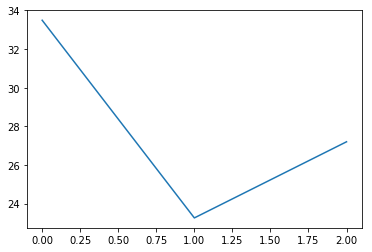

In [65]:
# these lines are equivalent, but with pipe we can make the logic flow
# entirely from left to right
plt.plot((2 * ds.temperature.sel(x=0)).mean('y'))

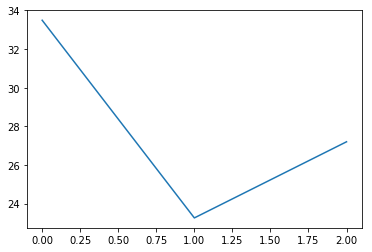

In [66]:
(ds.temperature.sel(x=0).pipe(lambda x: 2 * x).mean('y').pipe(plt.plot))

使用`xarray`，即使从磁盘上的文件中延迟加载变量，创建新数据集也不会有性能损失。创建新对象而不是改变现有对象通常会使代码更容易理解，所以我们鼓励使用这种方法。

### 重命名变量
另一个有用的选项是`rename()`重命名数据集变量的方法：

In [67]:
ds.rename({'temperature': 'temp', 'precipitation': 'precip'})

<xarray.Dataset>
Dimensions:         (time: 3, x: 2, y: 2)
Coordinates:
    lat             (x, y) float64 42.25 42.21 42.63 42.59
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temp            (x, y, time) float64 16.93 8.901 15.1 16.56 14.36 12.1 ...
    precip          (x, y, time) float64 3.376 9.389 9.728 5.69 3.36 8.61 ...

相关`swap_dims()`方法允许您交换维度和非维度变量：

In [68]:
ds.coords['day'] = ('time', [6, 7, 8])

ds.swap_dims({'time': 'day'})

<xarray.Dataset>
Dimensions:         (day: 3, x: 2, y: 2)
Coordinates:
    lat             (x, y) float64 42.25 42.21 42.63 42.59
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
    time            (day) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
  * day             (day) int32 6 7 8
Dimensions without coordinates: x, y
Data variables:
    temperature     (x, y, day) float64 16.93 8.901 15.1 16.56 14.36 12.1 ...
    precipitation   (x, y, day) float64 3.376 9.389 9.728 5.69 3.36 8.61 ...

### 修改坐标
要在数据和坐标之间来回转换，可以使用 `set_coords()`和 `reset_coords()`方法：

In [69]:
ds.reset_coords()

<xarray.Dataset>
Dimensions:         (time: 3, x: 2, y: 2)
Coordinates:
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
Dimensions without coordinates: x, y
Data variables:
    temperature     (x, y, time) float64 16.93 8.901 15.1 16.56 14.36 12.1 ...
    precipitation   (x, y, time) float64 3.376 9.389 9.728 5.69 3.36 8.61 ...
    lat             (x, y) float64 42.25 42.21 42.63 42.59
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
    reference_time  datetime64[ns] 2014-09-05
    day             (time) int32 6 7 8

In [70]:
ds.set_coords(['temperature', 'precipitation'])

<xarray.Dataset>
Dimensions:         (time: 3, x: 2, y: 2)
Coordinates:
    temperature     (x, y, time) float64 16.93 8.901 15.1 16.56 14.36 12.1 ...
    precipitation   (x, y, time) float64 3.376 9.389 9.728 5.69 3.36 8.61 ...
    lat             (x, y) float64 42.25 42.21 42.63 42.59
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
    day             (time) int32 6 7 8
Dimensions without coordinates: x, y
Data variables:
    *empty*

In [71]:
ds['temperature'].reset_coords(drop=True)

<xarray.DataArray 'temperature' (x: 2, y: 2, time: 3)>
array([[[ 16.927629,   8.900522,  15.097617],
        [ 16.559953,  14.359952,  12.102166]],

       [[ 12.401412,  -2.778328,  11.162389],
        [ 23.257175,   5.250884,  11.991798]]])
Coordinates:
  * time     (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
Dimensions without coordinates: x, y

### 坐标方法
`Coordinates` 对象也有一些有用的方法，主要用于将它们转换为数据集对象：

In [72]:
ds.coords.to_dataset()

<xarray.Dataset>
Dimensions:         (time: 3, x: 2, y: 2)
Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
    reference_time  datetime64[ns] 2014-09-05
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    day             (time) int32 6 7 8
    lat             (x, y) float64 42.25 42.21 42.63 42.59
Dimensions without coordinates: x, y
Data variables:
    *empty*

合并方法特别有趣，因为它实现了用于在算术运算中合并坐标的相同逻辑（请参阅计算）：

In [73]:
alt = xr.Dataset(coords={'z': [10], 'lat': 0, 'lon': 0})

In [74]:
ds.coords.merge(alt.coords)

<xarray.Dataset>
Dimensions:         (time: 3, z: 1)
Coordinates:
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
    day             (time) int32 6 7 8
  * z               (z) int32 10
Data variables:
    *empty*

要将坐标（或任何DataArray）转换为实际 坐标`pandas.Index`，请使用以下`to_index()`方法：

In [88]:
ds['time'].to_index()

DatetimeIndex(['2014-09-06', '2014-09-07', '2014-09-08'], dtype='datetime64[ns]', name='time', freq='D')

有用的快捷方式是`indexes`属性（在两个DataArray和 Dataset），该懒惰地构造一个词典，其关键字由每个维度中给出，并且其值是`Index`对象：

In [89]:
ds.indexes

time: DatetimeIndex(['2014-09-06', '2014-09-07', '2014-09-08'], dtype='datetime64[ns]', name='time', freq='D')

Xarray支持使用以下标记标记坐标值`pandas.MultiIndex`：

In [77]:
midx = pd.MultiIndex.from_arrays(
    [['R', 'R', 'V', 'V'], [.1, .2, .7, .9]], names=('band', 'wn'))

In [78]:
mda = xr.DataArray(np.random.rand(4), coords={'spec': midx}, dims='spec')
mda

<xarray.DataArray (spec: 4)>
array([ 0.487095,  0.044041,  0.437193,  0.088307])
Coordinates:
  * spec     (spec) MultiIndex
  - band     (spec) object 'R' 'R' 'V' 'V'
  - wn       (spec) float64 0.1 0.2 0.7 0.9

为方便起见，多索引级别可直接作为“虚拟”或“派生”坐标进行访问（-打印数据集或数据阵列时标记）

In [79]:
mda['band']

<xarray.DataArray 'band' (spec: 4)>
array(['R', 'R', 'V', 'V'], dtype=object)
Coordinates:
  * spec     (spec) MultiIndex
  - band     (spec) object 'R' 'R' 'V' 'V'
  - wn       (spec) float64 0.1 0.2 0.7 0.9

In [80]:
mda.wn

<xarray.DataArray 'wn' (spec: 4)>
array([ 0.1,  0.2,  0.7,  0.9])
Coordinates:
  * spec     (spec) MultiIndex
  - band     (spec) object 'R' 'R' 'V' 'V'
  - wn       (spec) float64 0.1 0.2 0.7 0.9

使用该`sel`方法也可以使用[多索引级索引](http://xarray.pydata.org/en/stable/indexing.html#multi-level-indexing)（请参阅多级索引）。